<a href="https://colab.research.google.com/github/whgustj00/MyFile/blob/main/%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8(2019315031_%EC%A1%B0%ED%98%84%EC%84%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 패키지 설치
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


필요한 패키지들을 설치 및 임포트한다

In [ ]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
data = pd.read_csv('/content/drive/MyDrive/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


데이터를 판다스 데이터 프레임으로 불러온 다음 확인한다. 중고차들의 연식, 판매 가격, 현재 가격, 주행 거리, 연료 타입 등의 정보가 있다.

중고차의 판매 가격에 있어 각 요소가 어땠을 때 판매 가격이 책정되는지, 어떤 요소가 가장 영향을 미치는지 등을 분석해 중고차 가격 예측 모델을 만들어, 중고차 시장에서 고객과 판매자가 합리적인 가격으로 중고차를 거래할 수 있도록 한다.

일반적으로 연식, 주행 거리, 현재 시세가 판매 가격에 가장 큰 영향을 끼치는 것으로 알고 있으며 또 어떤 요소가 판매 가격에 영향을 끼치는지 확인해본다.




해당 데이터에 대한 도메인 지식

Car_Name: 자동차의 모델명을 나타낸다. 이 변수는 자동차의 종류, 제조사, 성능 등과 관련된 정보를 담고 있을 수 있다.

Year: 자동차의 제조 연도를 나타낸다. 이 변수는 자동차의 연식과 관련이 있으며, 일반적으로 오래된 자동차일수록 가치가 낮을 수 있다.

Selling_Price: 중고차의 판매 가격을 나타낸다. 이 변수는 중고차의 시장 가치를 반영하며, 주요한 예측 대상 변수다.

Present_Price: 현재 중고차의 시장 가격을 나타낸다. 이 변수는 중고차의 현재 가치를 반영하는 지표로 사용된다.

Driven_kms: 자동차의 주행 거리를 나타낸다. 이 변수는 자동차의 운행 상태를 나타내는 중요한 지표로 사용된다.

Fuel_Type: 자동차의 연료 종류를 나타낸다. 연료 종류는 "Petrol" (휘발유), "Diesel" (경유), "CNG" (압축 자연가스)이다.

Selling_type: 중고차의 판매 유형을 나타낸다. "Dealer" (딜러 판매)와 "Individual" (개인 판매)으로 구분된다.

Transmission: 자동차의 변속기 타입을 나타낸다. "Manual" (수동)과 "Automatic" (자동)으로 구분된다.

Owner: 자동차의 소유자 수를 나타낸다. 이 값이 낮을수록 중고차의 가치가 높아질 수 있다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


데이터 셋의 속성들이 결측값이 있는지, 데이터 타입이 어떤 것인지 알기 위해 info 함수를 사용했다.

In [ ]:
# 범주형 데이터 변환
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data.replace({"Selling_type":{"Individual":0,"Dealer":1}},inplace=True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

replace 함수를 이용해 문자열 형태의 범주형 데이터였던 연료 타입, 변속기 타입, 판매 타입을 숫자로 변환해준다.

In [ ]:
# 상관계수 행렬
data.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,0.053643,0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,0.509467,0.550724,0.367128,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.440493,0.512121,0.348776,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.166801,0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440493,0.166801,1.000000,0.352415,0.080466,-0.055705
Selling_type,0.039896,0.550724,0.512121,0.101419,0.352415,1.000000,0.063240,-0.124269
Transmission,-0.000394,0.367128,0.348776,0.162510,0.080466,0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008058,0.089216,-0.055705,-0.124269,0.050316,1.000000


상관 계수를 통해 절대값이 큰 요소들을 실제로 판매 가격과 관련 있는지 시각화하여 분석하고 독립 변수로 채택한다.

In [ ]:
data.replace({"Fuel_Type": {0: "Petrol", 1: "Diesel", 2: "CNG"}}, inplace=True)
data.replace({"Selling_type": {0: "Individual", 1: "Dealer"}}, inplace=True)
data.replace({"Transmission": {0: "Manual", 1: "Automatic"}}, inplace=True)

데이터 시각화를 위해 다시 범주형 데이터들을 원래대로 돌려놓았다.

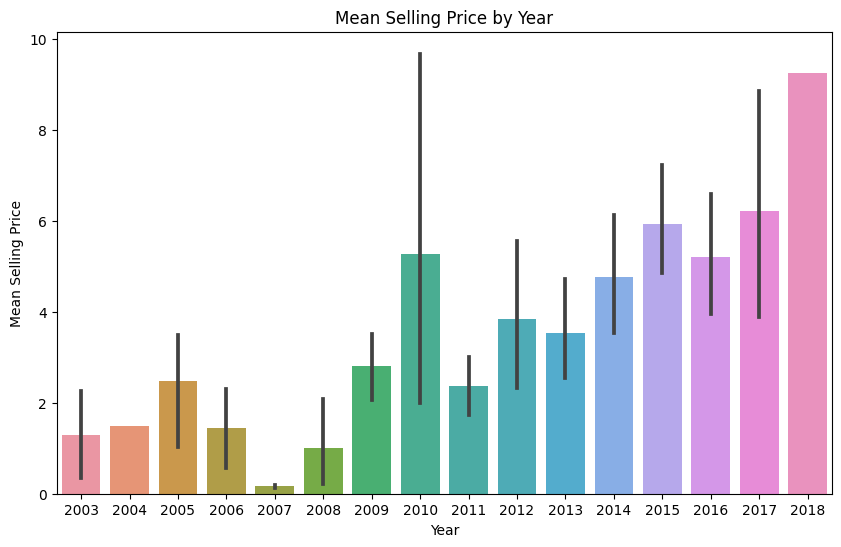

In [ ]:
# 연식에 따른 평균 판매 가격의 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Year', y='Selling_Price')
plt.xlabel('Year')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Year')
plt.show()

연식에 따른 평균적인 판매 가격을 시각화 한 것이다.

연식에 따라 판매 가격에 유의미한 영향을 주므로 독립 변수로 채택한다.


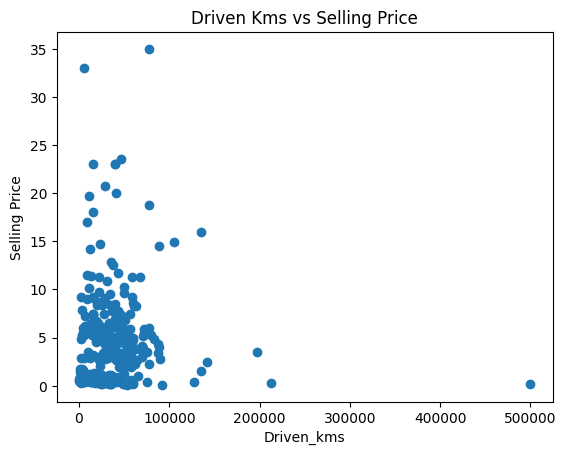

In [ ]:
# 주행 거리와 판매 가격의 산점도
plt.scatter(data['Driven_kms'], data['Selling_Price'])
plt.xlabel('Driven_kms')
plt.ylabel('Selling Price')
plt.title('Driven Kms vs Selling Price')
plt.show()

주행 거리에 따른 판매 가격을 시각화 한 것이다.

이 데이터 셋에서는 주행 거리에 따른 판매 가격은 영향이 크지 않지만 일반적으로 중고차를 구입할 때 주행 거리는 중요한 요소이기 때문에 독립변수로 채택한다.

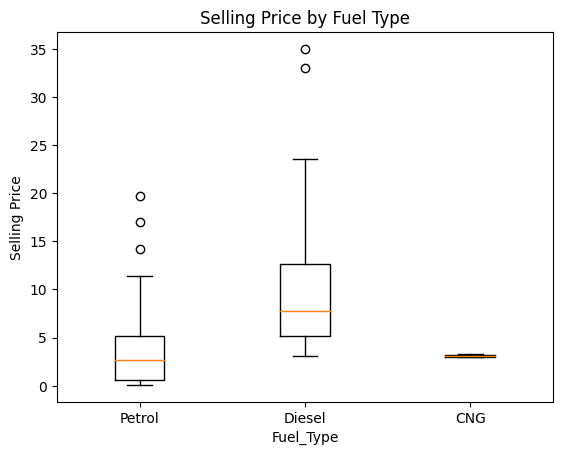

In [ ]:
# 연료 타입에 따른 판매 가격의 박스 플롯
seller_types = data['Fuel_Type'].unique()
data_boxplot = [data[data['Fuel_Type'] == s]['Selling_Price'] for s in seller_types]
plt.boxplot(data_boxplot, labels=seller_types)
plt.xlabel('Fuel_Type')
plt.ylabel('Selling Price')
plt.title('Selling Price by Fuel Type')
plt.show()

연료 타입에 따른 판매 가격을 시각화 한 것이다.

디젤이 가솔린에 비해 평균적으로 판매 가격이 높기 때문에 연료 타입이 영향이 있는 것으로 보며 독립 변수로 채택한다.

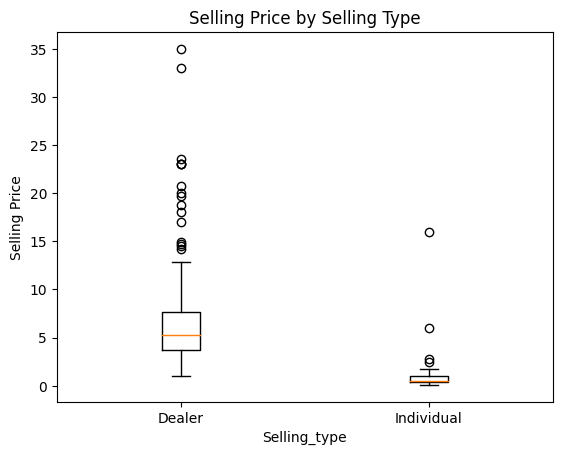

In [ ]:
# 판매 타입에 따른 판매 가격의 박스 플롯
seller_types = data['Selling_type'].unique()
data_boxplot = [data[data['Selling_type'] == s]['Selling_Price'] for s in seller_types]
plt.boxplot(data_boxplot, labels=seller_types)
plt.xlabel('Selling_type')
plt.ylabel('Selling Price')
plt.title('Selling Price by Selling Type')
plt.show()

판매 타입에 따른 판매 가격을 시각화 한 것이다.

개인보다 딜러가 판매하는 경우가 가격이 높기 때문에 독립 변수로 채택한다.

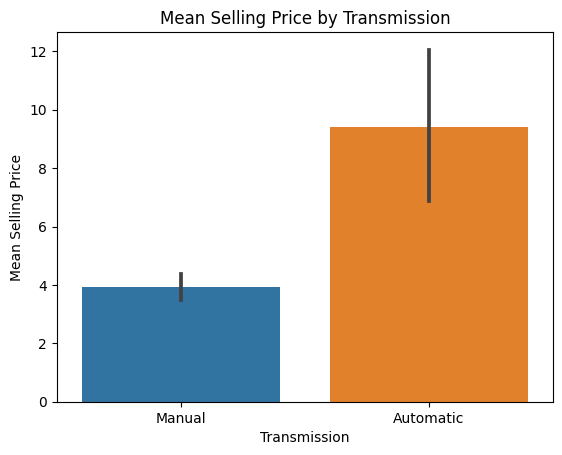

In [ ]:
# 변속기 타입에 따른 판매 가격의 막대 그래프
sns.barplot(data=data, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Transmission')
plt.show()

변속기 종류에 따른 판매 가격을 시각화 한 것이다.

수동보다 자동이 평균적으로 더 높은 가격을 보이므로 독립 변수로 채택한다.

In [ ]:
# 범주형 데이터 변환
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data.replace({"Selling_type":{"Individual":0,"Dealer":1}},inplace=True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

예측 모델을 만들기 위해 범주형 데이터를 다시 숫자로 변환해준다.

In [ ]:
selected_features = ['Year', 'Driven_kms','Present_Price', 'Fuel_Type', 'Selling_type', 'Transmission']

데이터 분석을 통해 판매 가격을 책정하는 요소들을 독립 변수로서 채택했다.


주행 거리는 상관계수가 낮게 나왔지만 일반적으로 중고차 판매 가격에 있어 영향을 주는 요소이기 때문에 추가했다.

In [ ]:
x = data[selected_features]
y = data['Selling_Price']

출력 데이터(y)인 판매 가격을 예측하기 위해 입력 데이터(x)에 독립 변수들을 입력했다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

train_test_split 함수를 사용해 학습 데이터와 테스트 데이터를 나눠주었으며,
test_size를 0.3로 설정해 전체 데이터의 30%를 테스트 데이터로 사용하도록 설정했다.
또, 동일한 결과를 얻기 위해 random_state를 이용했다.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

주어진 데이터를 통해 선형 회귀 모델을 생성했다.

In [ ]:
# 학습셋의 결정계수 계산
y_train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)

# 테스트셋의 결정계수 계산
y_test_pred = model.predict(x_test)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set R-squared:", train_r2)
print("Test set R-squared:", test_r2)

Training set R-squared: 0.8724217542305057
Test set R-squared: 0.8815657564160139


In [ ]:
# 학습 데이터에 대한 예측 결과 계산
train_pred = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_pred)

# 테스트 데이터에 대한 예측 결과 계산
test_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test, test_pred)

print("Training set MSE:", train_mse)
print("Test set MSE:", test_mse)

Training set MSE: 3.131106470582683
Test set MSE: 3.3723204073083797


예측 모델의 성능을 평가하기 위해 평균 제곱 오차와 결정 계수를 구했다.

학습셋과 테스트셋의 평균 제곱 오차와 결정 계수 차이가 적은 것을 볼 수 있으며, 모델의 과적합 가능성이 낮다고 볼 수 있다.

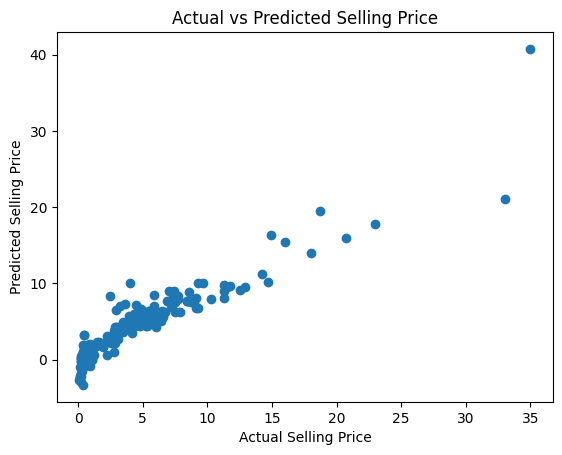

In [ ]:
# 실제 판매 가격과 예측한 판매 가격의 산점도
y_train_pred = model.predict(x_train)

plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

생성한 선형 회귀 모델의 학습 데이터를 기반으로 실제 판매 가격과 예측한 판매 가격을 비교한 것을 산점도로 나타내었다.


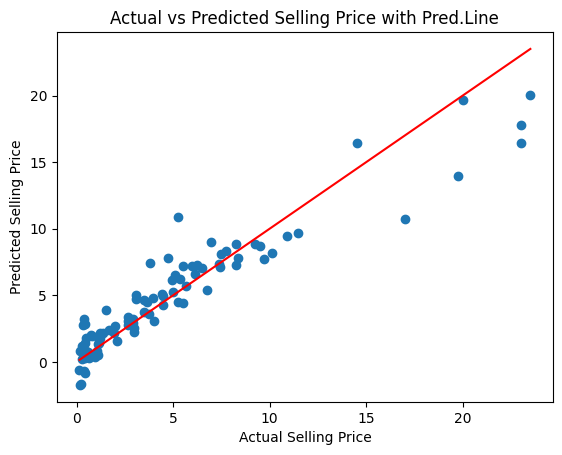

In [ ]:
# 테스트 데이터 예측 선 그래프
y_actual = y_test  # 실제 판매 가격 데이터

# 예측 판매 가격
y_pred = model.predict(x_test)  # 예측 판매 가격 데이터

# 산점도 그리기
plt.scatter(y_actual, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price with Pred.Line')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')
plt.show()

테스트 데이터들의 실제 가격과 예측 가격 산점도에 예측 선을 그려 시각화했다.

모델 해석 및 결론.

현재 가격이 높고 딜러가 판매, 디젤 타입, 자동 변속기, 최신 연식인 차량이 대부분 높은 판매 가격을 보였다.

이 데이터셋에서 판매 가격에 가장 큰 영향을 끼치는 독립 변수는 현재 가격이다.

우리가 흔히 알고 있는 지식으론 주행 거리가 중고차의 가격을 정하는데 있어서 큰 영향을 끼치지만 이 데이터셋에서는 유의미할 정도로 큰 차이를 주지는 않았다. 때문에 주행 거리와 판매 가격에 대한 상관성을 보이기 위해 더 많은 데이터가 필요하다고 생각한다.